In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

read the csv after finding horizontal threshold, vertical thresholds. make it such that it follows the given format

final csv is the csv that has columns Id, Top-Left, Bottom-Right, Top, Left, Bottom, Right, Top_box, Bottom_box, Left_box, Right_box

Id - refers to box ID -> int

Top-Left,Bottom-Right - refers to the xy coordinates of topleft and bottomright coordinate of a bounding box

Top/Left/Bottom/Right - refers to the coordinates of edge centers

Top_box/Bottom_box/Left_box/Right_box - refers to the nearest box from current box such that the words across paragraphs or columns should not get connected -> List:[dist, nearest box ID]


In [2]:
df = pd.read_csv('../Data/CSV/TLBR_68.csv')


In [3]:
img = cv2.imread('../Data/images/68.jpg')

Given below are two functions to visualize the document image and the connections established.

visualize_bboxes() can be used to visualize a document image with the bounding boxes around words. Bounding box information is given in the CSVs provided

make_connections() can be used to verify and visualize the connections established between words such that it satisfies the given criteria of grouping words in a logical paragraph. This function has to be used after getting the final csv in the specified format

## Provided script

In [4]:
def visualize_bboxes(img):
  img_2 = img.copy()
  for index, rows in df.iterrows():
    top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
    bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
    # print(top_left)
    cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)

  plt.rcParams['figure.figsize'] = (6, 4)  # Adjust the width and height as needed
  plt.rcParams['figure.dpi'] = 300
  plt.axis('off')
  plt.imshow(img_2)

In [5]:
def make_connections(image):

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image_with_boxes = image_rgb.copy()

  for index, row in euclidean.iterrows():
      left = int(row['Left'][0])
      right = int(row['Right'][0])
      top = int(row['Top'][1])
      bottom = int(row['Bottom'][1])
      box_id = int(row['Id'])

      width = right - left
      height = bottom - top

      top_left = (left, top)
      bottom_right = (right, bottom)

      cv2.rectangle(image_with_boxes, top_left, bottom_right, (255, 0, 0), 2)

      label_position = (left, top - 10)
      cv2.putText(image_with_boxes, str(box_id), label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

      top_adjacent_id = int(row['Top_Box'][1])
      bottom_adjacent_id = int(row['Bottom_Box'][1])
      left_adjacent_id = int(row['Left_Box'][1])
      right_adjacent_id = int(row['Right_Box'][1])

      if top_adjacent_id != 0:
          top_adjacent_row = euclidean[euclidean['Id'] == top_adjacent_id].iloc[0]
          top_adjacent_center = int(top_adjacent_row['Bottom'][0]) , int(top_adjacent_row['Bottom'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(top)), top_adjacent_center, (0, 255, 0), 2)

      if bottom_adjacent_id != 0:
          bottom_adjacent_row = euclidean[euclidean['Id'] == bottom_adjacent_id].iloc[0]
          bottom_adjacent_center = int(bottom_adjacent_row['Top'][0]) , int(bottom_adjacent_row['Top'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(bottom)), (int(bottom_adjacent_center[0]), int(bottom_adjacent_center[1])), (0, 255, 0), 2)

      if left_adjacent_id != 0:
          left_adjacent_row = euclidean[euclidean['Id'] == left_adjacent_id].iloc[0]
          left_adjacent_center = int(left_adjacent_row['Right'][0]) , int(left_adjacent_row['Right'][1])
          cv2.line(image_with_boxes, (int(left), int(top) + height // 2), (int(left_adjacent_center[0]), int(left_adjacent_center[1])), (0, 255, 0), 2)

      if right_adjacent_id != 0:
          right_adjacent_row = euclidean[euclidean['Id'] == right_adjacent_id].iloc[0]
          right_adjacent_center = int(right_adjacent_row['Left'][0]) , int(right_adjacent_row['Left'][1])
          cv2.line(image_with_boxes, (int(right), int(top) + height // 2), (int(right_adjacent_center[0]), int(right_adjacent_center[1])), (0, 255, 0), 2)

  return image_with_boxes

## Visualizing the enclosing boxes

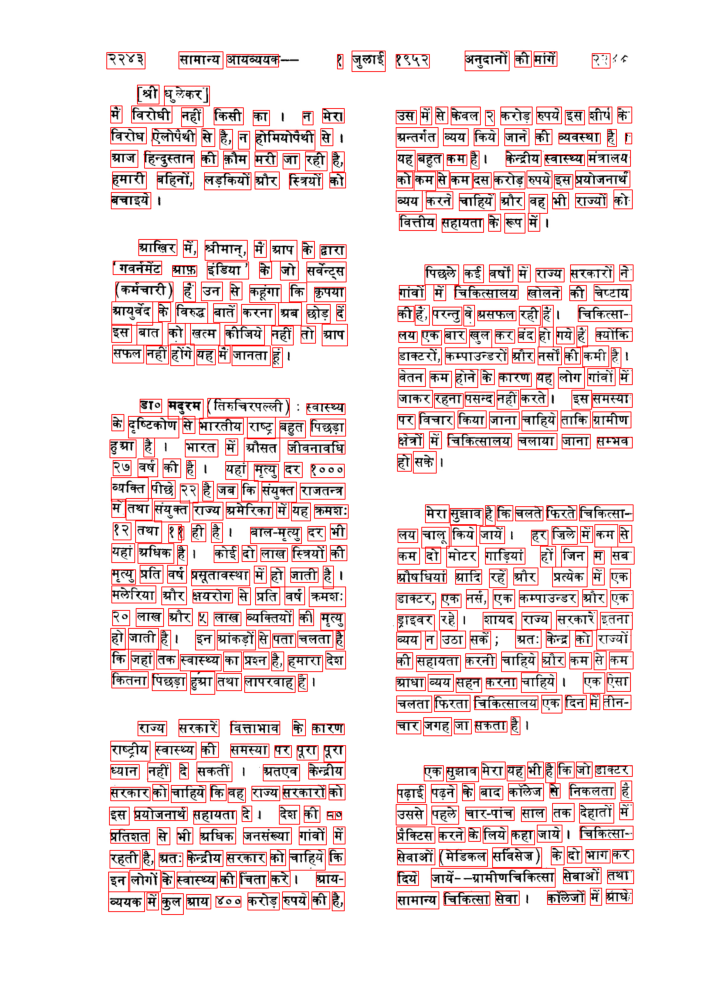

In [6]:
visualize_bboxes(img)

In [7]:
image_CSV = pd.read_csv('../Data/CSV/TLBR_68.csv')
X = image_CSV.iloc[:, 1:4].values
X = image_CSV.iloc[:, 1:4].values
image_CSV.columns
print(X.shape)

(498, 3)


In [8]:
num_points = X.shape[0]
X_trans = np.zeros((X.shape[0] , 2))
for i in range(num_points):
    top_left_1 = [int(X[i][0].split(',')[0][1:]),int(X[i][0].split(',')[1][:-1])]
    bottom_right_1 = [int(X[i][1].split(',')[0][1:]),int(X[i][1].split(',')[1][:-1])]
    center_1 = [(top_left_1[0] + bottom_right_1[0]) // 2, (top_left_1[1] + bottom_right_1[1]) // 2]
    X_trans[i] = np.array(center_1).astype('float')

In [9]:
data = []
thresh = [5, 140]

def distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def get_indices_less_than(values, threshold):
    """Get indices of values less than a threshold."""
    return [i for i, value in enumerate(values) if value < threshold]

def get_indices_greater_than(values, threshold):
    """Get indices of values greater than a threshold."""
    return [i for i, value in enumerate(values) if value > threshold]

X_trans_y = [point[1] for point in X_trans]
X_trans_x = [point[0] for point in X_trans]

for i in range(len(X_trans)):
    top_box = [float('inf'), -1]
    bottom_box = [float('inf'), -1]
    right_box = [float('inf'), -1]
    left_box = [float('inf'), -1]

    top_box_indices = get_indices_less_than(X_trans_y, X_trans[i][1])
    bottom_box_indices = get_indices_greater_than(X_trans_y, X_trans[i][1])
    right_box_indices = get_indices_greater_than(X_trans_x, X_trans[i][0])
    left_box_indices = get_indices_less_than(X_trans_x, X_trans[i][0])

    for index in top_box_indices:
        dis = distance(X_trans[index], X_trans[i])
        if dis < top_box[0] and dis < thresh[1]:
            top_box = [dis, index]

    for index in bottom_box_indices:
        dis = distance(X_trans[index], X_trans[i])
        if dis < bottom_box[0] and dis < thresh[1]:
            bottom_box = [dis, index]

    for index in right_box_indices:
        dis = distance(X_trans[index], X_trans[i])
        if dis < right_box[0] and dis < thresh[0]:
            right_box = [dis, index]

    for index in left_box_indices:
        dis = distance(X_trans[index], X_trans[i])
        if dis < left_box[0] and dis < thresh[0]:
            left_box = [dis, index]

    boxes = [top_box, bottom_box, right_box, left_box]
    for box in boxes:
        if box[1] == -1:
            box[0], box[1] = -1, 0

    top_left = [int(coord) for coord in X[i][0][1:-1].split(',')]
    bottom_right = [int(coord) for coord in X[i][1][1:-1].split(',')]

    edges = [
        [(top_left[0] + bottom_right[0]) // 2, top_left[1]],
        [(top_left[0] + bottom_right[0]) // 2, bottom_right[1]],
        [top_left[0], (top_left[1] + bottom_right[1]) // 2],
        [bottom_right[0], (top_left[1] + bottom_right[1]) // 2]
    ]

    data.append([i] + edges + boxes)


In [10]:
columns = ['Id', 'Top', 'Right', 'Bottom', 'Left', 'Top_Box', 'Right_Box', 'Bottom_Box', 'Left_Box']
euclidean = pd.DataFrame(data , columns=columns)
euclidean.head()

,Id,Top,Right,Bottom,Left,Top_Box,Right_Box,Bottom_Box,Left_Box
0,0,"[362, 85]","[362, 147]","[290, 116]","[435, 116]","[-1, 0]","[-1, 0]","[-1, 0]","[-1, 0]"
1,1,"[646, 82]","[646, 147]","[563, 114]","[730, 114]","[-1, 0]","[-1, 0]","[-1, 0]","[-1, 0]"
2,2,"[842, 92]","[842, 140]","[744, 116]","[940, 116]","[-1, 0]","[-1, 0]","[-1, 0]","[-1, 0]"
3,3,"[1173, 92]","[1173, 147]","[1163, 119]","[1184, 119]","[108.00462953040486, 4]","[-1, 0]","[-1, 0]","[-1, 0]"
4,4,"[1281, 79]","[1281, 157]","[1218, 118]","[1344, 118]","[-1, 0]","[108.00462953040486, 3]","[-1, 0]","[-1, 0]"


(-0.5, 2474.5, 3499.5, -0.5)

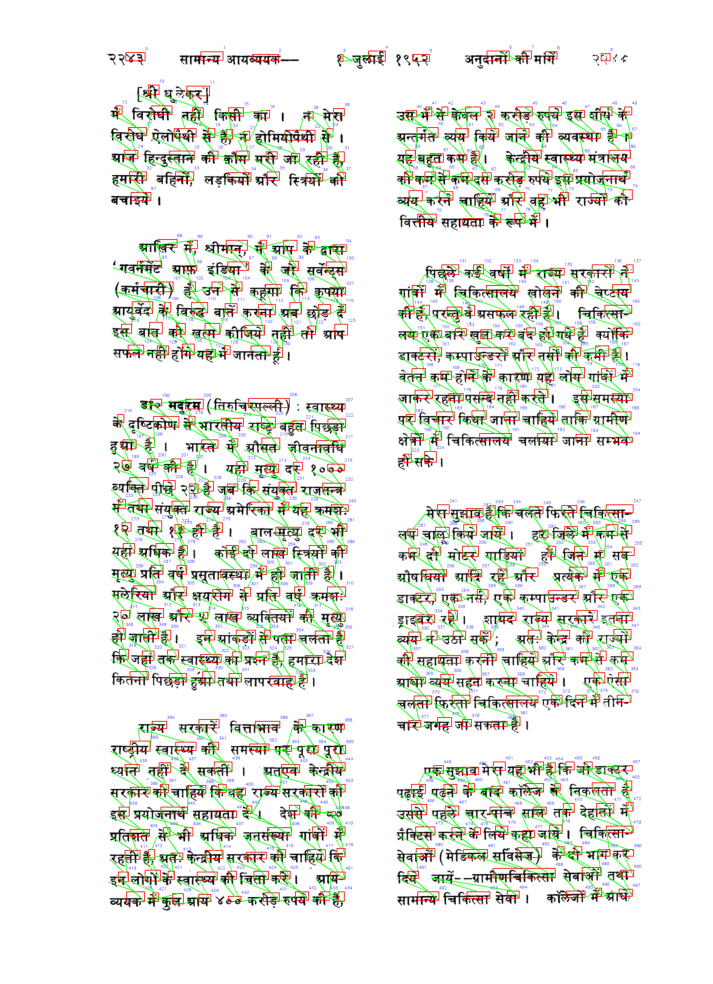

In [11]:
image_with_boxes = make_connections(img)
plt.imshow(image_with_boxes)
plt.axis('off')